In [5]:
import numpy as np
from typing import Dict
from amld_rl.envs.easy21 import Easy21
from amld_rl.models.mc_model import MCModel
from amld_rl.models.sarsa_model import SarsaModel
from amld_rl.trainer.trainer import Trainer
from amld_rl.plots.plotlib import PlotLib
import matplotlib.pyplot as plt

We start by running the basic Monte Carlo simulation for the Easy21 game

In [6]:
env = Easy21()
n_episodes: int = int(1e5)

mc_params: Dict = {
    "environment": env,
    "N0": 100,
    "episode_log_freq": 100
}

mc_model = MCModel(
    params=mc_params.copy()
)
mc_trainer = Trainer(
    model=mc_model,
    n_episodes=n_episodes,
)
# Run the training process
mc_trainer.train()
value_func: np.ndarray = mc_model.get_state_value


100%|██████████| 100000/100000 [00:03<00:00, 29160.63it/s]


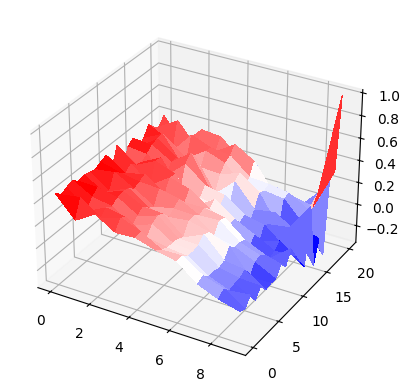

In [7]:
PlotLib.plot_value(env, value_func)

We now make an implementation of the Sarsa Algorithm (State, action, reward, next state, next action). We will run the algorithm with multiples values of lambda: we will be trying values between $[1,20]$. We will be comparing the $Q$ functions of both the Monte-Carlo agent and the SARSA agent. 

In [8]:
n_episodes: int = int(1e4)
lambdas: np.ndarray = np.linspace(0, 1, 10)
mc_q_function: np.ndarray = mc_model.get_state_action_value

sarsa_params: Dict = {
    "N0": 100,
    "environment": env,
    "episode_log_freq": 100,
    "lambda_param": 0,
    "gamma": 1
}
errors: np.ndarray = np.zeros_like(lambdas)
for i, lambda_ in enumerate(lambdas):
    sarsa_params["lambda_param"] = lambda_
    sarsa_model = SarsaModel(sarsa_params.copy())

    trainer = Trainer(sarsa_model, n_episodes)
    trainer.train()
    sarsa_q_function = sarsa_model.get_state_action_value
    errors[i] = np.mean((mc_q_function - sarsa_q_function) ** 2)



100%|██████████| 10000/10000 [00:00<00:00, 45390.79it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


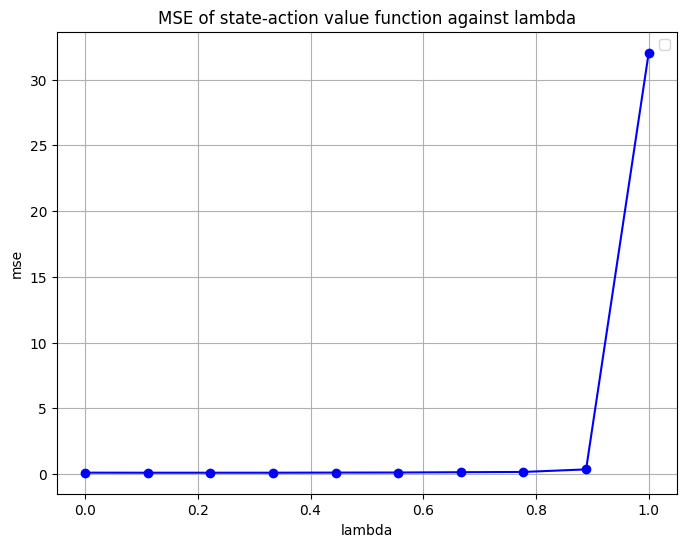

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(lambdas, errors, marker='o', linestyle='-', color='b')
plt.title('MSE of state-action value function against lambda')
plt.xlabel('lambda')
plt.ylabel('mse')
plt.grid(True)
plt.legend()
plt.show()


100%|██████████| 10000/10000 [00:00<00:00, 47580.04it/s]


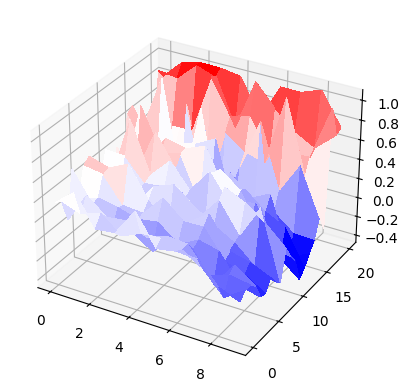

In [10]:
sarsa_params["lambda_param"] = 0.5
sarsa_model = SarsaModel(sarsa_params)
trainer = Trainer(sarsa_model, n_episodes)
trainer.train()

PlotLib.plot_value(env, sarsa_model.get_state_value)